# Steam Game Data Analysis

## Project Overview
The purpose of this project is to explore and analyze data from **Steam**, one of the largest digital platforms for video games. By utilizing this dataset, the project aims to uncover valuable insights into player behavior, game success factors, and market trends. These insights will assist stakeholders, including game developers, publishers, and analysts, in making informed decisions to improve game development strategies and marketing efforts.


---

## Scope and Objectives

### Understanding Player Preferences
- Analyze game genres, user tags, and ratings to identify trends in player preferences.
- Explore the impact of user reviews and community feedback on game success.

### Market Trends Analysis
- Investigate the relationship between release dates, game ratings, and popularity over time.
- Determine the influence of hardware requirements on the success and reception of games.

### Feature Correlation
- Assess the contribution of game attributes, such as graphics, gameplay complexity, and genres, to overall player satisfaction.

### Data-Driven Decision Making
- Provide actionable recommendations based on the analysis to help developers and stakeholders tailor their offerings to target audiences.

---

## Techniques and Methodologies

### Data Loading and Cleaning
- The dataset is imported using **Pandas**, and missing or inconsistent values are handled appropriately to ensure data integrity.

### Feature Engineering
- Key attributes like genres and user tags are normalized for better aggregation.

### Visualization
- Relationships between variables are explored through **scatter plots**, **histograms**, and **trend lines** to provide intuitive insights.

### Machine Learning Applications
- **Random Forest Classification** is applied to predict games' reception based on their characteristics.
- **Principal Component Analysis (PCA)** is used to reduce dimensionality and uncover hidden patterns in the data.

---

## Significance
This project my perspective on data-driven approach on market research. Merging the business needs for insights with programming-based data anlaytical skills, the depth of the research can weight a lot more in a convincing manner and provides an new line of thoughts that needs to be answered for future business development.


# Step 1: Load and inspect the Data
#### 1. Load the CSV File:
- Use pandas to read the csv file into a dataframe.

In [56]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.decomposition import PCA
import ace_tools_open as tools
import ast

In [57]:
file_path = 'filepath here'
data = pd.read_csv(file_path)


#### 2. Inspect the DataFrame:
- Get an overview of the dataset's structure and content.

In [58]:
# Display basic information about the DataFrame
print(data.info())

# Show summary statistics for numerical columns
print(data.describe())

# Display the first few rows of the DataFrame
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              197 non-null    int64 
 1   Title                   197 non-null    object
 2   Graphs                  197 non-null    object
 3   Memory                  197 non-null    object
 4   OS                      197 non-null    object
 5   Processor               197 non-null    object
 6   Storage                 197 non-null    object
 7   app_id                  197 non-null    int64 
 8   Original Price          197 non-null    object
 9   Developer               197 non-null    object
 10  Publisher               197 non-null    object
 11  Genre                   197 non-null    object
 12  Release Date            197 non-null    object
 13  User Tags               197 non-null    object
 14  All Time Reception      181 non-null    object
 15  Total 

# Step 2: Handle Missing Data
#### 1. Identify Missing Values:
- Check for any missing values in the dataset.

In [59]:
# Sum of missing values per column
print(data.isnull().sum())

Unnamed: 0                 0
Title                      0
Graphs                     0
Memory                     0
OS                         0
Processor                  0
Storage                    0
app_id                     0
Original Price             0
Developer                  0
Publisher                  0
Genre                      0
Release Date               0
User Tags                  0
All Time Reception        16
Total Count of Reviews     0
Rating                     0
Best Rating                0
Worst Rating               0
dtype: int64


#### 2. Handle Missing Data:
- Decide whether to drop or impute missing values based on their significance

In [60]:
check_values = data['All Time Reception'].unique()
print(check_values)

['Overwhelmingly Positive' 'Very Positive' 'Mostly Positive' nan]


In [61]:
# Example: Drop rows with missing values in a specific column
data.dropna(subset=['All Time Reception'], inplace = True)

# Example: Fill missing values with the mean of the column
# data['column_name'].fillna(data['column_name'].mean(), inplace=True)

#print(data.isnull().sum())
print(data.describe())

       Unnamed: 0        app_id  Total Count of Reviews      Rating  \
count  181.000000  1.810000e+02            1.810000e+02  181.000000   
mean    97.596685  1.346013e+06            1.516861e+05    8.817680   
std     57.505631  8.487797e+05            3.085671e+05    1.102984   
min      0.000000  5.500000e+02            7.400000e+01    6.000000   
25%     47.000000  5.529900e+05            1.191600e+04    9.000000   
50%     98.000000  1.282100e+06            4.560000e+04    9.000000   
75%    147.000000  1.973710e+06            1.537190e+05    9.000000   
max    196.000000  3.152780e+06            2.465160e+06   10.000000   

       Best Rating  Worst Rating  
count        181.0         181.0  
mean          10.0           1.0  
std            0.0           0.0  
min           10.0           1.0  
25%           10.0           1.0  
50%           10.0           1.0  
75%           10.0           1.0  
max           10.0           1.0  


- Address the missing values for "All Time Reception" column by leveraging its positive correlation with the "Rating" column

In [62]:
reception_rating_summary = data.groupby('All Time Reception')['Rating'].describe()
print(reception_rating_summary)

                         count      mean       std  min   25%   50%   75%  \
All Time Reception                                                          
Mostly Positive           37.0  7.189189  1.049811  6.0   7.0   7.0   7.0   
Overwhelmingly Positive   46.0  9.826087  0.383223  9.0  10.0  10.0  10.0   
Very Positive             98.0  8.959184  0.516099  6.0   9.0   9.0   9.0   

                          max  
All Time Reception             
Mostly Positive           9.0  
Overwhelmingly Positive  10.0  
Very Positive            10.0  


In [63]:
# Group by "All Time Reception" and calculate statistics for "Rating"
reception_rating_stats = data.dropna(subset=['All Time Reception', 'Rating']).groupby('All Time Reception')['Rating'].agg(['min', 'max', 'mean'])
print(reception_rating_stats)


                         min  max      mean
All Time Reception                         
Mostly Positive            6    9  7.189189
Overwhelmingly Positive    9   10  9.826087
Very Positive              6   10  8.959184


In [64]:
# Extract thresholds from observed statistics
thresholds = {
    'Overwhelmingly Positive': reception_rating_stats.loc['Overwhelmingly Positive']['min'],
    'Very Positive': reception_rating_stats.loc['Very Positive']['min'],
    'Mostly Positive': reception_rating_stats.loc['Mostly Positive']['min']
}

# Set thresholds dynamically
def impute_reception(row):
    if pd.isnull(row['All Time Reception']):
        if row['Rating'] >= thresholds['Overwhelmingly Positive']:
            return 'Overwhelmingly Positive'
        elif row['Rating'] >= thresholds['Very Positive']:
            return 'Very Positive'
        elif row['Rating'] >= thresholds['Mostly Positive']:
            return 'Mostly Positive'
        else:
            return 'Unknown'  # For Ratings below all thresholds
    else:
        return row['All Time Reception']

# Apply the function to impute missing values
data['All Time Reception'] = data.apply(impute_reception, axis=1)


In [65]:
# Check remaining missing values
print(data['All Time Reception'].isnull().sum())

# Display the distribution of "All Time Reception" after imputation
print(data['All Time Reception'].value_counts())

0
All Time Reception
Very Positive              98
Overwhelmingly Positive    46
Mostly Positive            37
Name: count, dtype: int64


In [66]:
backup = data.copy() # after imputations
backup.head()

,Unnamed: 0,Title,Graphs,Memory,OS,Processor,Storage,app_id,Original Price,Developer,Publisher,Genre,Release Date,User Tags,All Time Reception,Total Count of Reviews,Rating,Best Rating,Worst Rating
0,0,Tabletop Simulator,1,1,1,1,1,286160,"₩ 160,400",Berserk Games,Berserk Games,Casual,"5 Jun, 2015","['Tabletop', 'Board Game', 'Simulation', 'Mult...",Overwhelmingly Positive,40549,10,10,1
1,1,Abiotic Factor,GeForce GTX 950 or Radeon HD 7970,8 GB RAM,Windows 10 or later,i5-8th Gen CPU or similar,10 GB available space,427410,"₩ 27,000",Deep Field Games,Playstack,Action,"2 May, 2024","['Survival', 'Online Co-Op', 'Open World Survi...",Overwhelmingly Positive,15476,10,10,1
2,2,Risk of Rain 2,GTX 580 / AMD HD 7870,4 GB RAM,1,Intel Core i3-6100 / AMD FX-8350,4 GB available space,632360,"₩ 32,240",Hopoo Games,Gearbox Publishing,Action,"11 Aug, 2020","['Third-Person Shooter', 'Action Roguelike', '...",Very Positive,201540,9,10,1
3,3,Star Wars Outlaws,"NVIDIA GeForce GTX 1660 (6 GB), AMD RX 5600XT...",16 GB RAM,"Windows 10, Windows 11 (64-bit versions)","AMD Ryzen 5 3600 @ 3.6 GHz, Intel Core i7-870...",65 GB available space,2842040,"₩ 110,200",Massive Entertainment – A Ubisoft Studio,Ubisoft,Action,"21 Nov, 2024","['Action', 'Singleplayer', 'Adventure', 'Actio...",Mostly Positive,616,7,10,1
4,4,Hearts of Iron IV,Nvidia® GeForce™ GTX 470 (1.28GB) | AMD® HD 5...,4 GB RAM,Windows® 10 Home 64 Bit,Intel® Core™ i5 750 | AMD® FX 4300,2 GB available space,394360,"₩ 160,250",Paradox Development Studio,Paradox Interactive,Simulation,"6 Jun, 2016","['Strategy', 'World War II', 'Grand Strategy',...",Very Positive,224948,9,10,1


# Step 3: Data Type Conversion
#### 1. Convert Columns to Appropriate Data Types:
- String to Datetime

In [67]:
# Known regex pattern for "%d %b, %Y"
pattern = r"^\d{1,2} [A-Za-z]{3}, \d{4}$"  # e.g., 5 Jun, 2015

# Filter out rows matching the known pattern
remaining_dates = data[~data['Release Date'].str.match(pattern, na=False)]['Release Date']

# Get unique values in the remaining dates
unique_remaining_dates = remaining_dates.unique()

# Print the unique values
print("Unique remaining dates after excluding '%d %b, %Y' pattern:")
print(unique_remaining_dates)


Unique remaining dates after excluding '%d %b, %Y' pattern:
['Apr 2019']


In [68]:
# Define expected formats
date_formats = [
    "%d %b, %Y",
    "%b %Y"
]

def parse_date_responsibly(date_str):
    for fmt in date_formats:
        try:
            return datetime.strptime(date_str, fmt)
        except ValueError:
            continue
    return None # Mark unparsed cases explicitly

data['Parsed Release Date'] = data['Release Date'].apply(parse_date_responsibly)

failed_parsing = data[data['Parsed Release Date'].isnull()]
print("Failed parsing dates of:")
print(failed_parsing['Release Date'])

Failed parsing dates of:
Series([], Name: Release Date, dtype: object)


In [69]:
data.head()

,Unnamed: 0,Title,Graphs,Memory,OS,Processor,Storage,app_id,Original Price,Developer,Publisher,Genre,Release Date,User Tags,All Time Reception,Total Count of Reviews,Rating,Best Rating,Worst Rating,Parsed Release Date
0,0,Tabletop Simulator,1,1,1,1,1,286160,"₩ 160,400",Berserk Games,Berserk Games,Casual,"5 Jun, 2015","['Tabletop', 'Board Game', 'Simulation', 'Mult...",Overwhelmingly Positive,40549,10,10,1,2015-06-05
1,1,Abiotic Factor,GeForce GTX 950 or Radeon HD 7970,8 GB RAM,Windows 10 or later,i5-8th Gen CPU or similar,10 GB available space,427410,"₩ 27,000",Deep Field Games,Playstack,Action,"2 May, 2024","['Survival', 'Online Co-Op', 'Open World Survi...",Overwhelmingly Positive,15476,10,10,1,2024-05-02
2,2,Risk of Rain 2,GTX 580 / AMD HD 7870,4 GB RAM,1,Intel Core i3-6100 / AMD FX-8350,4 GB available space,632360,"₩ 32,240",Hopoo Games,Gearbox Publishing,Action,"11 Aug, 2020","['Third-Person Shooter', 'Action Roguelike', '...",Very Positive,201540,9,10,1,2020-08-11
3,3,Star Wars Outlaws,"NVIDIA GeForce GTX 1660 (6 GB), AMD RX 5600XT...",16 GB RAM,"Windows 10, Windows 11 (64-bit versions)","AMD Ryzen 5 3600 @ 3.6 GHz, Intel Core i7-870...",65 GB available space,2842040,"₩ 110,200",Massive Entertainment – A Ubisoft Studio,Ubisoft,Action,"21 Nov, 2024","['Action', 'Singleplayer', 'Adventure', 'Actio...",Mostly Positive,616,7,10,1,2024-11-21
4,4,Hearts of Iron IV,Nvidia® GeForce™ GTX 470 (1.28GB) | AMD® HD 5...,4 GB RAM,Windows® 10 Home 64 Bit,Intel® Core™ i5 750 | AMD® FX 4300,2 GB available space,394360,"₩ 160,250",Paradox Development Studio,Paradox Interactive,Simulation,"6 Jun, 2016","['Strategy', 'World War II', 'Grand Strategy',...",Very Positive,224948,9,10,1,2016-06-06


- String to Float (price info)

In [70]:
# Find unique values other than the ones with "₩"
other_than_currency = data['Original Price'][~data['Original Price'].str.contains('\₩')]
print(other_than_currency.unique())


['Free To Play' 'Factorio Demo' 'Free']


In [71]:
print(type(other_than_currency))

<class 'pandas.core.series.Series'>


In [72]:
'''
Handle common issues such as:
- Stripping non-numeric characters like ₩ or $.
- Handling special values (e.g., "Free to play" → 0).
- Converting cleaned values to numeric format.
'''
def clean_price(price):
    if isinstance(price, str):
        # Remove currency symbols and commas
        price = re.sub(r"[₩$,]", "", price)
        
        # Handle unique cases
        if price in list(other_than_currency.unique()):
            return 0.0
    
    try:
        # Convert to float if possible
        return float(price)
    except ValueError:
        return None # Return None for unparsable values


In [73]:
'''
3. Apply the Cleaning Function
- Use the function to clean the price data and handle unparseable values explicitly.
'''

# Apply the cleaning function to the 'Original Price' column
data['Cleaned Price'] = data['Original Price'].apply(clean_price)

# Identify rows where cleaning failed
failed_prices = data[data['Cleaned Price'].isnull()]['Original Price']
print("Uncleaned prices: ")
print(failed_prices)

Uncleaned prices: 
Series([], Name: Original Price, dtype: object)


In [74]:
# Check for mixed data types
for col in data.columns:
    unique_types = data[col].map(type).nunique()
    if unique_types > 2:
        print(f"Column '{col}' has mixed data types")

# Step 4: Handle Duplicates
#### 1. Identify and Remove Duplicate Rows:

In [75]:
# Check for and remove any duplicate entries in the dataset
duplicates = data.duplicated()
print(f"Number of duplilicate rows: {duplicates.sum()}")

# Remove duplicate rows
data.drop_duplicates(inplace = True)

Number of duplilicate rows: 0


# Step 5: Text Normalization
#### 1. Standardize Text Data:

In [76]:
data.head()

,Unnamed: 0,Title,Graphs,Memory,OS,Processor,Storage,app_id,Original Price,Developer,...,Genre,Release Date,User Tags,All Time Reception,Total Count of Reviews,Rating,Best Rating,Worst Rating,Parsed Release Date,Cleaned Price
0,0,Tabletop Simulator,1,1,1,1,1,286160,"₩ 160,400",Berserk Games,...,Casual,"5 Jun, 2015","['Tabletop', 'Board Game', 'Simulation', 'Mult...",Overwhelmingly Positive,40549,10,10,1,2015-06-05,160400.0
1,1,Abiotic Factor,GeForce GTX 950 or Radeon HD 7970,8 GB RAM,Windows 10 or later,i5-8th Gen CPU or similar,10 GB available space,427410,"₩ 27,000",Deep Field Games,...,Action,"2 May, 2024","['Survival', 'Online Co-Op', 'Open World Survi...",Overwhelmingly Positive,15476,10,10,1,2024-05-02,27000.0
2,2,Risk of Rain 2,GTX 580 / AMD HD 7870,4 GB RAM,1,Intel Core i3-6100 / AMD FX-8350,4 GB available space,632360,"₩ 32,240",Hopoo Games,...,Action,"11 Aug, 2020","['Third-Person Shooter', 'Action Roguelike', '...",Very Positive,201540,9,10,1,2020-08-11,32240.0
3,3,Star Wars Outlaws,"NVIDIA GeForce GTX 1660 (6 GB), AMD RX 5600XT...",16 GB RAM,"Windows 10, Windows 11 (64-bit versions)","AMD Ryzen 5 3600 @ 3.6 GHz, Intel Core i7-870...",65 GB available space,2842040,"₩ 110,200",Massive Entertainment – A Ubisoft Studio,...,Action,"21 Nov, 2024","['Action', 'Singleplayer', 'Adventure', 'Actio...",Mostly Positive,616,7,10,1,2024-11-21,110200.0
4,4,Hearts of Iron IV,Nvidia® GeForce™ GTX 470 (1.28GB) | AMD® HD 5...,4 GB RAM,Windows® 10 Home 64 Bit,Intel® Core™ i5 750 | AMD® FX 4300,2 GB available space,394360,"₩ 160,250",Paradox Development Studio,...,Simulation,"6 Jun, 2016","['Strategy', 'World War II', 'Grand Strategy',...",Very Positive,224948,9,10,1,2016-06-06,160250.0


##### Create a quantifier that represents the necessary hardware power for a game needs to run

###### Assume that every game will run with an NVIDIA graphic card, and its counterpart will have a similar performance, only narrow down to the required NVIDIA graphic cards and label its performance score as an index.

###### Keep in mind that a game requiring higher level of hardware does not mean its a quality game. 

In [77]:
# Step 1: Split conglomerated GPU values into multiple columns
# Split on common delimiters like '|', '/' and ','
data['Graphs_Split'] = data['Graphs'].str.split(r'[|/,]|\sor\s')

# Step 2: Normalize GPU names
def normalize_gpu_name(gpu_name):
    if pd.isna(gpu_name):
        return None
    
    # Remove extra spaces, lowercase, and standardize
    gpu_name = gpu_name.strip().lower()
    gpu_name = re.sub(r'\(.*?\)', '', gpu_name) # Remove text in parentheses
    gpu_name = re.sub(r'amd|intel', '', gpu_name) # Remove brand names
    gpu_name = re.sub(r'[^a-z0-9\s]', '', gpu_name) # Remove special characters
    
    return gpu_name.strip()

data['Normalize_Graphs'] = data['Graphs_Split'].apply(lambda x : [normalize_gpu_name(gpu) for gpu in x] if isinstance(x, list) else [])

In [78]:
data.head()

,Unnamed: 0,Title,Graphs,Memory,OS,Processor,Storage,app_id,Original Price,Developer,...,User Tags,All Time Reception,Total Count of Reviews,Rating,Best Rating,Worst Rating,Parsed Release Date,Cleaned Price,Graphs_Split,Normalize_Graphs
0,0,Tabletop Simulator,1,1,1,1,1,286160,"₩ 160,400",Berserk Games,...,"['Tabletop', 'Board Game', 'Simulation', 'Mult...",Overwhelmingly Positive,40549,10,10,1,2015-06-05,160400.0,[1],[1]
1,1,Abiotic Factor,GeForce GTX 950 or Radeon HD 7970,8 GB RAM,Windows 10 or later,i5-8th Gen CPU or similar,10 GB available space,427410,"₩ 27,000",Deep Field Games,...,"['Survival', 'Online Co-Op', 'Open World Survi...",Overwhelmingly Positive,15476,10,10,1,2024-05-02,27000.0,"[ GeForce GTX 950, Radeon HD 7970]","[geforce gtx 950, radeon hd 7970]"
2,2,Risk of Rain 2,GTX 580 / AMD HD 7870,4 GB RAM,1,Intel Core i3-6100 / AMD FX-8350,4 GB available space,632360,"₩ 32,240",Hopoo Games,...,"['Third-Person Shooter', 'Action Roguelike', '...",Very Positive,201540,9,10,1,2020-08-11,32240.0,"[ GTX 580 , AMD HD 7870]","[gtx 580, hd 7870]"
3,3,Star Wars Outlaws,"NVIDIA GeForce GTX 1660 (6 GB), AMD RX 5600XT...",16 GB RAM,"Windows 10, Windows 11 (64-bit versions)","AMD Ryzen 5 3600 @ 3.6 GHz, Intel Core i7-870...",65 GB available space,2842040,"₩ 110,200",Massive Entertainment – A Ubisoft Studio,...,"['Action', 'Singleplayer', 'Adventure', 'Actio...",Mostly Positive,616,7,10,1,2024-11-21,110200.0,"[ NVIDIA GeForce GTX 1660 (6 GB), AMD RX 5600...","[nvidia geforce gtx 1660, rx 5600xt, arc a750 ..."
4,4,Hearts of Iron IV,Nvidia® GeForce™ GTX 470 (1.28GB) | AMD® HD 5...,4 GB RAM,Windows® 10 Home 64 Bit,Intel® Core™ i5 750 | AMD® FX 4300,2 GB available space,394360,"₩ 160,250",Paradox Development Studio,...,"['Strategy', 'World War II', 'Grand Strategy',...",Very Positive,224948,9,10,1,2016-06-06,160250.0,"[ Nvidia® GeForce™ GTX 470 (1.28GB) , AMD® HD...","[nvidia geforce gtx 470, hd 5850, iris xe g7, ..."


In [79]:
# From each element of a list, only pick the list with the NVIDIA Graphic card(i.e. the ones that has "geforce" or "gtx" or "nvidia") and take out its element per additional column.

def extract_nvidia_cards(gpu_list):
    if not isinstance(gpu_list, list):
        return []
    keywords = ["nvidia", "geforce", "gtx"]
    return [gpu for gpu in gpu_list if any(keyword in gpu for keyword in keywords)]

data['NVIDIA_Cards'] = data['Normalize_Graphs'].apply(extract_nvidia_cards)

In [80]:
# Add columns to place each element of the list for the substances in 'NVIDIA_Cards'
# data['NVIDIA_Cards'].apply(len).max() // 2
data['NVIDIA_Card_1'] = data['NVIDIA_Cards'].apply(lambda x: x[0] if len(x) > 0 else None)
data['NVIDIA_Card_2'] = data['NVIDIA_Cards'].apply(lambda x: x[1] if len(x) > 1 else None)

In [81]:
data.head()

,Unnamed: 0,Title,Graphs,Memory,OS,Processor,Storage,app_id,Original Price,Developer,...,Rating,Best Rating,Worst Rating,Parsed Release Date,Cleaned Price,Graphs_Split,Normalize_Graphs,NVIDIA_Cards,NVIDIA_Card_1,NVIDIA_Card_2
0,0,Tabletop Simulator,1,1,1,1,1,286160,"₩ 160,400",Berserk Games,...,10,10,1,2015-06-05,160400.0,[1],[1],[],None,None
1,1,Abiotic Factor,GeForce GTX 950 or Radeon HD 7970,8 GB RAM,Windows 10 or later,i5-8th Gen CPU or similar,10 GB available space,427410,"₩ 27,000",Deep Field Games,...,10,10,1,2024-05-02,27000.0,"[ GeForce GTX 950, Radeon HD 7970]","[geforce gtx 950, radeon hd 7970]",[geforce gtx 950],geforce gtx 950,None
2,2,Risk of Rain 2,GTX 580 / AMD HD 7870,4 GB RAM,1,Intel Core i3-6100 / AMD FX-8350,4 GB available space,632360,"₩ 32,240",Hopoo Games,...,9,10,1,2020-08-11,32240.0,"[ GTX 580 , AMD HD 7870]","[gtx 580, hd 7870]",[gtx 580],gtx 580,None
3,3,Star Wars Outlaws,"NVIDIA GeForce GTX 1660 (6 GB), AMD RX 5600XT...",16 GB RAM,"Windows 10, Windows 11 (64-bit versions)","AMD Ryzen 5 3600 @ 3.6 GHz, Intel Core i7-870...",65 GB available space,2842040,"₩ 110,200",Massive Entertainment – A Ubisoft Studio,...,7,10,1,2024-11-21,110200.0,"[ NVIDIA GeForce GTX 1660 (6 GB), AMD RX 5600...","[nvidia geforce gtx 1660, rx 5600xt, arc a750 ...",[nvidia geforce gtx 1660],nvidia geforce gtx 1660,None
4,4,Hearts of Iron IV,Nvidia® GeForce™ GTX 470 (1.28GB) | AMD® HD 5...,4 GB RAM,Windows® 10 Home 64 Bit,Intel® Core™ i5 750 | AMD® FX 4300,2 GB available space,394360,"₩ 160,250",Paradox Development Studio,...,9,10,1,2016-06-06,160250.0,"[ Nvidia® GeForce™ GTX 470 (1.28GB) , AMD® HD...","[nvidia geforce gtx 470, hd 5850, iris xe g7, ...",[nvidia geforce gtx 470],nvidia geforce gtx 470,None


In [82]:
# Replace NaN with an empty string
data['NVIDIA_Card_1'] = data['NVIDIA_Card_1'].fillna('')

# Apply the filtering condition and extract unique values
filtered_unique = data.loc[
    data['NVIDIA_Card_1'].str.split().apply(len) > 0, 'NVIDIA_Card_1'
].unique()

# Display the unique values
print(len(filtered_unique))
print(filtered_unique)


93
['geforce gtx 950' 'gtx 580' 'nvidia geforce gtx 1660'
 'nvidia geforce gtx 470' 'geforce gtx 760' 'nvidia geforce gtx 660'
 'geforce gtx 460' 'nvidia geforce gtx 1060 3 gb'
 'nvidia geforce gtx 750ti' 'geforce gtx 960' 'nvidia geforce 670 gtx'
 'geforce gtx 1060 6gb' 'nvidia geforce gtx 1650 4gb'
 'nvidia geforce gt 1030' 'nvidia geforce gtx 1050ti'
 'nvidia geforce gtx 1050 ti or  radeon rx 570' 'geforce 900 series'
 'geforce gtx 1050' 'nvidia geforce gtx 1060' 'nvidia geforce gtx660'
 'nvidia geforce gtx 780' 'nvidia geforce gtx 950' 'geforce gt 1030'
 'nvidia geforce gtx 1050' 'nvidia geforce gtx 650   radeon 7750   a310'
 'nvidia geforce gt 730' 'nvidia geforce gtx 750' 'nvidia gtx 1050'
 'nvidia geforce gtx 645' 'geforce gtx 1060 3gb' 'nvidia gtx 750ti'
 'nvidia geforce gtx 960 2gb' 'gtx1060' 'nvidia geforce gtx 660 2gb'
 'nvidia gtx 1050ti 4 gb vram' 'gtx 970 4gb' 'nvidia geforce gtx 460'
 'nvidia geforce gtx 750 ti maxwell' 'nvidia geforce gtx 670'
 'nvidia geforce gtx 960' 

In [83]:
# Cleanse irregular names

# Define the irregular names
irregular_names_graphs = [
    'dx11 compatible geforce gtx 460 1gb',
    'directx 11 capable gpu with 1gb vram  geforce gtx 750 ti',
    'geforce gtx 560 ti  radeon hd 7750',
    'nvidia geforce gtx 1050 ti or  radeon rx 570',
    'nvidia geforce gtx 650   radeon 7750   a310',
    '19201080 nvidia geforce gtx 770'
]

# Desired replacements
replacements = {
    'dx11 compatible geforce gtx 460 1gb': 'geforce gtx 460 1gb',
    'directx 11 capable gpu with 1gb vram  geforce gtx 750 ti': 'geforce gtx 750 ti',
    'geforce gtx 560 ti  radeon hd 7750': 'geforce gtx 560 ti',
    'nvidia geforce gtx 1050 ti or  radeon rx 570': 'geforce gtx 1050 ti',
    'nvidia geforce gtx 650   radeon 7750   a310': 'geforce gtx 650',
    '19201080 nvidia geforce gtx 770': 'geforce gtx 770'
}

# Replace irregular values in the "Graphs" column
data['NVIDIA_Card_1'] = data['NVIDIA_Card_1'].replace(replacements)

# Verify the replacements
print(data['NVIDIA_Card_1'].loc[data['NVIDIA_Card_1'].isin(replacements.values())])

28     geforce gtx 1050 ti
43         geforce gtx 650
98         geforce gtx 770
121     geforce gtx 750 ti
124     geforce gtx 560 ti
171    geforce gtx 460 1gb
189        geforce gtx 650
Name: NVIDIA_Card_1, dtype: object


In [84]:
gpu_performance_scores = {
    "geforce 900 series": 5334,
    "geforce 9600 gt": 483,
    "geforce 9800gtx": 605,
    "geforce gt 1030": 2456,
    "geforce gt 740": 1482,
    "geforce gtx 1050": 5034,
    "geforce gtx 1050 ti": 6316,
    "geforce gtx 1060 3gb": 9761,
    "geforce gtx 1060 6gb": 10077,
    "geforce gtx 1650": 7872,
    "geforce gtx 460": 2262,
    "geforce gtx 460 1gb": 2262,
    "geforce gtx 560": 2755,
    "geforce gtx 560 ti": 3054,
    "geforce gtx 630": 678,
    "geforce gtx 650": 1751,
    "geforce gtx 650 ti": 3345,
    "geforce gtx 670": 5235,
    "geforce gtx 700 series": 3347,
    "geforce gtx 750 4gb": 3900,
    "geforce gtx 750 ti": 3900,
    "geforce gtx 760": 4793,
    "geforce gtx 770": 5914,
    "geforce gtx 950": 5334,
    "geforce gtx 960": 6081,
    "gtx 1050": 5034,
    "gtx 1050 2gb": 5034,
    "gtx 1060": 10077,
    "gtx 1070": 13500,
    "gtx 580": 4614,
    "gtx 650 ti 1gb": 3345,
    "gtx 970 4gb": 9637,
    "gtx1060": 9761,
    "nvidia 450": 1319,
    "nvidia 450 gts": 1319,
    "nvidia 6600": 86,
    "nvidia geforce 670 gtx": 5235,
    "nvidia geforce 9600m gt": 140,
    "nvidia geforce gt 1030": 2456,
    "nvidia geforce gt 420": 425,
    "nvidia geforce gt 730": 835,
    "nvidia geforce gts 450": 1319,
    "nvidia geforce gtx 1050": 5034,
    "nvidia geforce gtx 1050 ti": 6316,
    "nvidia geforce gtx 1050 ti with 4gb vram": 6316,
    "nvidia geforce gtx 1050ti": 6316,
    "nvidia geforce gtx 1060": 10077,
    "nvidia geforce gtx 1060 3 gb": 9761,
    "nvidia geforce gtx 1060 6gb": 10077,
    "nvidia geforce gtx 1070": 13500,
    "nvidia geforce gtx 1070 ti": 14696,
    "nvidia geforce gtx 1650": 7872,
    "nvidia geforce gtx 1650 4gb": 7872,
    "nvidia geforce gtx 1660": 11675,
    "nvidia geforce gtx 460": 2262,
    "nvidia geforce gtx 470": 3107,
    "nvidia geforce gtx 550 ti": 1553,
    "nvidia geforce gtx 645": 1882,
    "nvidia geforce gtx 650 ti": 3345,
    "nvidia geforce gtx 660": 4002,
    "nvidia geforce gtx 660 2gb": 4002,
    "nvidia geforce gtx 670": 5235,
    "nvidia geforce gtx 680 2 gb": 5566,
    "nvidia geforce gtx 750": 3347,
    "nvidia geforce gtx 750 ti": 3900,
    "nvidia geforce gtx 750 ti maxwell": 3900,
    "nvidia geforce gtx 750ti": 3900,
    "nvidia geforce gtx 770": 5914,
    "nvidia geforce gtx 780": 8008,
    "nvidia geforce gtx 950": 5334,
    "nvidia geforce gtx 960": 6081,
    "nvidia geforce gtx 960 2gb": 3355,
    "nvidia geforce gtx 960 4gb": 3375,
    "nvidia geforce gtx 970": 9637,
    "nvidia geforce gtx660": 4002,
    "nvidia gpu geforce gtx 660": 4002,
    "nvidia gtx 1050": 5034,
    "nvidia gtx 1050ti 4 gb vram": 6316,
    "gtx 1050ti": 6316,
    "nvidia gtx 1060": 10077,
    "nvidia gtx 1060 3gb": 9761,
    "nvidia gtx 1650": 7872,
    "nvidia gtx 460": 2262,
    "nvidia gtx 460 1gb": 2262,
    "nvidia gtx 470 1gb": 3107,
    "nvidia gtx 650 2gb": 1751,
    "nvidia gtx 650 ti": 3345,
    "nvidia gtx 660": 4002,
    "nvidia gtx 750ti": 3900,
    "nvidia gtx 750ti 4g": 3900,
    "nvidia gtx 780 3gb": 8008,
    "nvidia gtx 950": 5334,
    "nvidia gtx 960": 6081,
    "nvidia gtx 970": 9637,
    "": -1,
    "gtx 1660ti": 12912
    
}

- Source: PassMark (2024-11-29, <a href = 'https://www.passmark.com/'>link</a>)

####

###### Assign scores for graphic card names

In [85]:
# Apply the matching to each NVIDIA card column
for col in ['NVIDIA_Card_1', 'NVIDIA_Card_2']:
    if col in data.columns:
        data[f'{col}_Score'] = data[col].dropna().apply(lambda x: gpu_performance_scores[x])

In [86]:
# Function to calculate the Graphic Req. Score for each row
def calculate_graphic_score(row):
    score_1 = row['NVIDIA_Card_1_Score']
    score_2 = row['NVIDIA_Card_2_Score']

    if pd.notnull(score_1) and pd.notnull(score_2):
        return min(score_1, score_2)  # Take the minimum if both are valid
    elif pd.isnull(score_1):
        return score_2  # Use score_2 if score_1 is null
    elif pd.isnull(score_2):
        return score_1  # Use score_1 if score_2 is null
    else:
        return None  # Return None if both are null

# Apply the function row-wise to create the new column
data['Graphic Req. Score'] = data.apply(calculate_graphic_score, axis=1)


In [87]:
data.head()

,Unnamed: 0,Title,Graphs,Memory,OS,Processor,Storage,app_id,Original Price,Developer,...,Parsed Release Date,Cleaned Price,Graphs_Split,Normalize_Graphs,NVIDIA_Cards,NVIDIA_Card_1,NVIDIA_Card_2,NVIDIA_Card_1_Score,NVIDIA_Card_2_Score,Graphic Req. Score
0,0,Tabletop Simulator,1,1,1,1,1,286160,"₩ 160,400",Berserk Games,...,2015-06-05,160400.0,[1],[1],[],,None,-1,NaN,-1.0
1,1,Abiotic Factor,GeForce GTX 950 or Radeon HD 7970,8 GB RAM,Windows 10 or later,i5-8th Gen CPU or similar,10 GB available space,427410,"₩ 27,000",Deep Field Games,...,2024-05-02,27000.0,"[ GeForce GTX 950, Radeon HD 7970]","[geforce gtx 950, radeon hd 7970]",[geforce gtx 950],geforce gtx 950,None,5334,NaN,5334.0
2,2,Risk of Rain 2,GTX 580 / AMD HD 7870,4 GB RAM,1,Intel Core i3-6100 / AMD FX-8350,4 GB available space,632360,"₩ 32,240",Hopoo Games,...,2020-08-11,32240.0,"[ GTX 580 , AMD HD 7870]","[gtx 580, hd 7870]",[gtx 580],gtx 580,None,4614,NaN,4614.0
3,3,Star Wars Outlaws,"NVIDIA GeForce GTX 1660 (6 GB), AMD RX 5600XT...",16 GB RAM,"Windows 10, Windows 11 (64-bit versions)","AMD Ryzen 5 3600 @ 3.6 GHz, Intel Core i7-870...",65 GB available space,2842040,"₩ 110,200",Massive Entertainment – A Ubisoft Studio,...,2024-11-21,110200.0,"[ NVIDIA GeForce GTX 1660 (6 GB), AMD RX 5600...","[nvidia geforce gtx 1660, rx 5600xt, arc a750 ...",[nvidia geforce gtx 1660],nvidia geforce gtx 1660,None,11675,NaN,11675.0
4,4,Hearts of Iron IV,Nvidia® GeForce™ GTX 470 (1.28GB) | AMD® HD 5...,4 GB RAM,Windows® 10 Home 64 Bit,Intel® Core™ i5 750 | AMD® FX 4300,2 GB available space,394360,"₩ 160,250",Paradox Development Studio,...,2016-06-06,160250.0,"[ Nvidia® GeForce™ GTX 470 (1.28GB) , AMD® HD...","[nvidia geforce gtx 470, hd 5850, iris xe g7, ...",[nvidia geforce gtx 470],nvidia geforce gtx 470,None,3107,NaN,3107.0


# Step 6: Basic Data Analysis Practices
#### 1. Exploratory Data Analysis (EDA)
##### Summarize and visualize distributions and relationships.

In [88]:
data.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)
data.columns

Index(['Index', 'Title', 'Graphs', 'Memory', 'OS', 'Processor', 'Storage',
       'app_id', 'Original Price', 'Developer', 'Publisher', 'Genre',
       'Release Date', 'User Tags', 'All Time Reception',
       'Total Count of Reviews', 'Rating', 'Best Rating', 'Worst Rating',
       'Parsed Release Date', 'Cleaned Price', 'Graphs_Split',
       'Normalize_Graphs', 'NVIDIA_Cards', 'NVIDIA_Card_1', 'NVIDIA_Card_2',
       'NVIDIA_Card_1_Score', 'NVIDIA_Card_2_Score', 'Graphic Req. Score'],
      dtype='object')

In [89]:
# Narrow down the columns necessary
df_EDA = data[[
    'Index', 'Title','Graphs','Storage',
    'Developer', 'Publisher', 'Genre',
    'User Tags', 'All Time Reception',
    'Total Count of Reviews', 'Rating', 'Best Rating', 'Worst Rating',
    'Parsed Release Date', 'Cleaned Price', 'Graphic Req. Score'        
]]


In [90]:
df_EDA_nums = data[[
    'Total Count of Reviews', 'Rating',
    'Parsed Release Date', 'Cleaned Price', 'Graphic Req. Score'
]]

In [91]:
df_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181 entries, 0 to 196
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Index                   181 non-null    int64         
 1   Title                   181 non-null    object        
 2   Graphs                  181 non-null    object        
 3   Storage                 181 non-null    object        
 4   Developer               181 non-null    object        
 5   Publisher               181 non-null    object        
 6   Genre                   181 non-null    object        
 7   User Tags               181 non-null    object        
 8   All Time Reception      181 non-null    object        
 9   Total Count of Reviews  181 non-null    int64         
 10  Rating                  181 non-null    int64         
 11  Best Rating             181 non-null    int64         
 12  Worst Rating            181 non-null    int64         


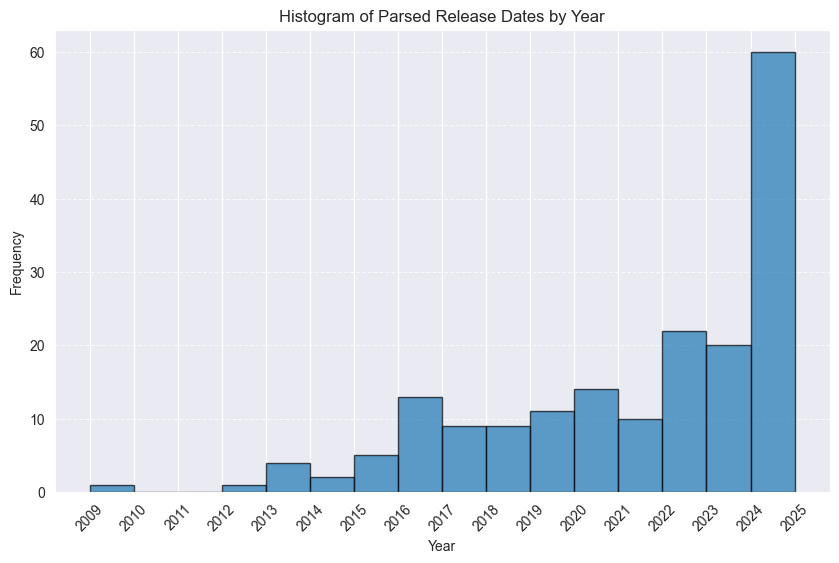

'\nPeople are aware of the games that have been launched recently.\n\n'

In [92]:
# Histogram
# Extract year for histogram
df_EDA = df_EDA.copy()
df_EDA['Year'] = df_EDA['Parsed Release Date'].dt.year


# Create the histogram
plt.figure(figsize=(10, 6))
bins = range(df_EDA['Year'].min(), df_EDA['Year'].max() + 2)  # Ensure yearly bins
plt.hist(df_EDA['Year'], bins=bins, edgecolor='black', alpha=0.7)

# Customize the x-axis to display all years
plt.xticks(bins, rotation=45)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Histogram of Parsed Release Dates by Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

'''
People are aware of the games that have been launched recently.

'''

'\nNotes:\n- Higher requirements can invoke negative reviews.\n- Map String data (e.g. genre, user-tag) into a measurable manner. \n\n'

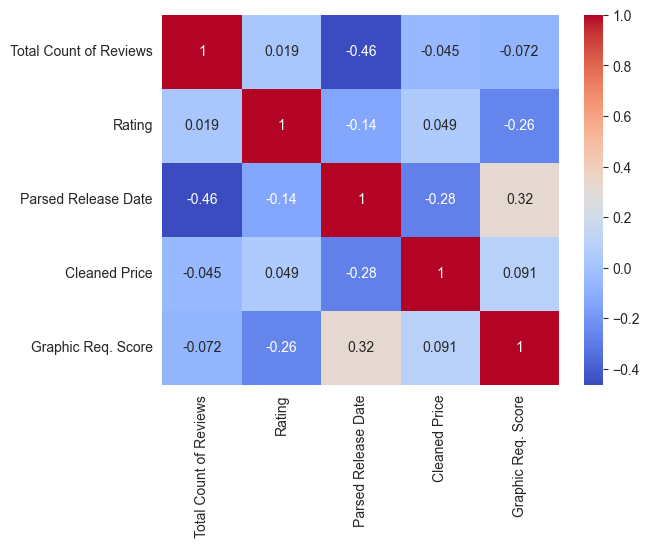

In [93]:
# Correlation heatmap
sns.heatmap(df_EDA_nums.corr(), annot=True, cmap='coolwarm')

'''
Notes:
- Higher requirements can invoke negative reviews.
- Map String data (e.g. genre, user-tag) into a measurable manner. 

'''


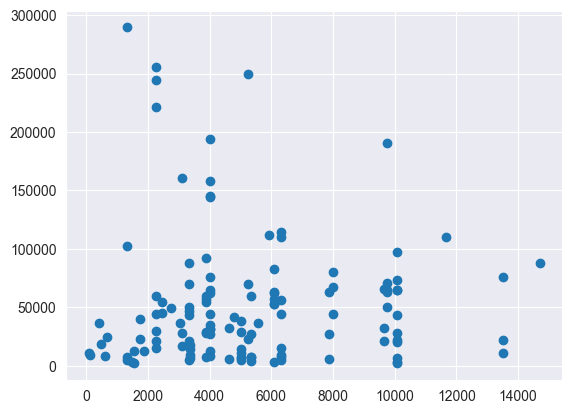

In [94]:

# Scatter plot
filtered_data = data[(data['Graphic Req. Score'] > 0) & (data['Cleaned Price'] > 0)]
plt.scatter(filtered_data['Graphic Req. Score'], filtered_data['Cleaned Price'])

plt.show()

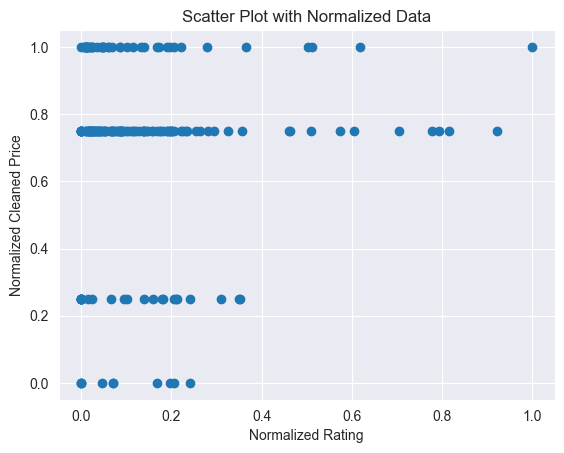

'\nNote:\n- Setting lower graphic requirements might result in a price increase.\n'

In [95]:
# Normalize data inline (min-max normalization)
# normalized_x = (data['Graphic Req. Score'] - data['Graphic Req. Score'].min()) / (data['Graphic Req. Score'].max() - data['Graphic Req. Score'].min())
normalized_y = (data['Rating'] - data['Rating'].min()) / (data['Rating'].max() - data['Rating'].min())
normalized_x = (data['Cleaned Price'] - data['Cleaned Price'].min()) / (data['Cleaned Price'].max() - data['Cleaned Price'].min())

# Scatter plot with normalized data
plt.scatter(normalized_x, normalized_y)
plt.xlabel('Normalized Rating')
plt.ylabel('Normalized Cleaned Price')
plt.title('Scatter Plot with Normalized Data')
plt.show()

'''
Note:
- Setting lower graphic requirements might result in a price increase.
'''

### Normalize Genre and User tags
##### Make the column values measurable for further analysis.

In [96]:
data['Genre']

0          Casual
1          Action
2          Action
3          Action
4      Simulation
          ...    
191        Action
192        Action
194        Casual
195        Action
196        Action
Name: Genre, Length: 181, dtype: object

In [97]:
data['User Tags']

0      ['Tabletop', 'Board Game', 'Simulation', 'Mult...
1      ['Survival', 'Online Co-Op', 'Open World Survi...
2      ['Third-Person Shooter', 'Action Roguelike', '...
3      ['Action', 'Singleplayer', 'Adventure', 'Actio...
4      ['Strategy', 'World War II', 'Grand Strategy',...
                             ...                        
191    ['Horror', 'Action', 'Survival Horror', 'Third...
192    ['Open World', 'RPG', 'Action RPG', 'Action', ...
194    ['Management', 'Simulation', 'Building', 'Sand...
195    ['RPG', 'Action RPG', 'JRPG', 'Singleplayer', ...
196    ['Psychological Horror', 'Survival Horror', 'H...
Name: User Tags, Length: 181, dtype: object

In [98]:
'''
Normalizing the genre and user-tag columns via one-hot encoding then reduce dimensionality with PCA,
as both values tend to form a pattern of words that gravitates toward the core-game mechanics.
'''


# Split the 'Genre' column into a list of genres
data['Genre'] = data['Genre'].str.split(', ')

# Split the 'User Tags' column into a list of tags (cleaning up string formatting)
data['User Tags'] = data['User Tags'].apply(
    lambda x: eval(x) if isinstance(x, str) and x.startswith('[') else []
)

# Initialize MultiLabelBinarizer
mlb_genre = MultiLabelBinarizer()
mlb_tags = MultiLabelBinarizer()

# Apply encoding for genres and user tags
genre_encoded = pd.DataFrame(mlb_genre.fit_transform(data['Genre']), columns=mlb_genre.classes_, index=data.index)
tags_encoded = pd.DataFrame(mlb_tags.fit_transform(data['User Tags']), columns=mlb_tags.classes_, index=data.index)

# Merge the encoded data back into the main dataframe
data_normalized = pd.concat([data, genre_encoded, tags_encoded], axis=1)

# Drop the original 'Genre' and 'User Tags' columns for clarity
# data_normalized.drop(['Genre', 'User Tags'], axis=1, inplace=True)


In [99]:
data_normalized.columns
#data_normalized.head()


Index(['Index', 'Title', 'Graphs', 'Memory', 'OS', 'Processor', 'Storage',
       'app_id', 'Original Price', 'Developer',
       ...
       'Walking Simulator', 'War', 'Wargame', 'Warhammer 40K', 'Western',
       'Wholesome', 'Word Game', 'World War II', 'Zombies', 'eSports'],
      dtype='object', length=348)

In [100]:
# Select only the one-hot encoded features for dimensionality reduction
encoded_columns = list(genre_encoded.columns) + list(tags_encoded.columns)
encoded_data = data_normalized[encoded_columns]

# Apply PCA to reduce dimensions while retaining 95% of the variance
pca = PCA(n_components=0.95)
reduced_data = pca.fit_transform(encoded_data)

# Create a new DataFrame with the reduced dimensions
reduced_columns = [f'PC{i+1}' for i in range(reduced_data.shape[1])]
reduced_df = pd.DataFrame(reduced_data, columns=reduced_columns, index=data.index)

# Ensure we correctly drop only columns that exist in the dataset
existing_encoded_columns = [col for col in encoded_columns if col in data_normalized.columns]

# Drop the existing encoded columns safely
remaining_data = data_normalized.drop(columns=existing_encoded_columns, errors='ignore')

# Add PCA-reduced dimensions back to the remaining dataset
optimized_data = pd.concat([remaining_data, reduced_df], axis=1)

In [101]:
optimized_data['Genre'] = data['Genre']
optimized_data['User Tags'] = data['User Tags']

In [102]:
optimized_data.head()

,Index,Title,Graphs,Memory,OS,Processor,Storage,app_id,Original Price,Developer,...,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100
0,0,Tabletop Simulator,1,1,1,1,1,286160,"₩ 160,400",Berserk Games,...,0.143625,0.074812,-0.045537,0.047221,0.080743,0.002301,-0.295764,-0.267699,0.134803,-0.236369
1,1,Abiotic Factor,GeForce GTX 950 or Radeon HD 7970,8 GB RAM,Windows 10 or later,i5-8th Gen CPU or similar,10 GB available space,427410,"₩ 27,000",Deep Field Games,...,0.082638,-0.050987,-0.335071,-0.064313,0.258791,-0.054216,0.452639,-0.174929,0.058593,0.191518
2,2,Risk of Rain 2,GTX 580 / AMD HD 7870,4 GB RAM,1,Intel Core i3-6100 / AMD FX-8350,4 GB available space,632360,"₩ 32,240",Hopoo Games,...,0.028074,-0.056300,-0.076109,0.034451,-0.070765,0.105881,-0.139948,0.261024,0.146961,0.083756
3,3,Star Wars Outlaws,"NVIDIA GeForce GTX 1660 (6 GB), AMD RX 5600XT...",16 GB RAM,"Windows 10, Windows 11 (64-bit versions)","AMD Ryzen 5 3600 @ 3.6 GHz, Intel Core i7-870...",65 GB available space,2842040,"₩ 110,200",Massive Entertainment – A Ubisoft Studio,...,0.335885,0.156399,-0.233161,0.196364,0.140082,-0.023427,-0.099757,0.203137,-0.130991,-0.057716
4,4,Hearts of Iron IV,Nvidia® GeForce™ GTX 470 (1.28GB) | AMD® HD 5...,4 GB RAM,Windows® 10 Home 64 Bit,Intel® Core™ i5 750 | AMD® FX 4300,2 GB available space,394360,"₩ 160,250",Paradox Development Studio,...,0.283785,0.008436,-0.223719,0.064440,0.083956,0.064916,0.110788,-0.079049,0.173146,0.044362


# Analysis Plan: Hypothesis Definition

## 1. Define Hypotheses for Analysis

### Hypothesis Ideas:

1. **Features vs. Reception**  
   - **Question:** Can we predict user reception ratings ("Positive", "Very Positive") based on price, graphical requirements, and other features?

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # Utilized as the baseline model
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [104]:
optimized_data.head()

,Index,Title,Graphs,Memory,OS,Processor,Storage,app_id,Original Price,Developer,...,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100
0,0,Tabletop Simulator,1,1,1,1,1,286160,"₩ 160,400",Berserk Games,...,0.143625,0.074812,-0.045537,0.047221,0.080743,0.002301,-0.295764,-0.267699,0.134803,-0.236369
1,1,Abiotic Factor,GeForce GTX 950 or Radeon HD 7970,8 GB RAM,Windows 10 or later,i5-8th Gen CPU or similar,10 GB available space,427410,"₩ 27,000",Deep Field Games,...,0.082638,-0.050987,-0.335071,-0.064313,0.258791,-0.054216,0.452639,-0.174929,0.058593,0.191518
2,2,Risk of Rain 2,GTX 580 / AMD HD 7870,4 GB RAM,1,Intel Core i3-6100 / AMD FX-8350,4 GB available space,632360,"₩ 32,240",Hopoo Games,...,0.028074,-0.056300,-0.076109,0.034451,-0.070765,0.105881,-0.139948,0.261024,0.146961,0.083756
3,3,Star Wars Outlaws,"NVIDIA GeForce GTX 1660 (6 GB), AMD RX 5600XT...",16 GB RAM,"Windows 10, Windows 11 (64-bit versions)","AMD Ryzen 5 3600 @ 3.6 GHz, Intel Core i7-870...",65 GB available space,2842040,"₩ 110,200",Massive Entertainment – A Ubisoft Studio,...,0.335885,0.156399,-0.233161,0.196364,0.140082,-0.023427,-0.099757,0.203137,-0.130991,-0.057716
4,4,Hearts of Iron IV,Nvidia® GeForce™ GTX 470 (1.28GB) | AMD® HD 5...,4 GB RAM,Windows® 10 Home 64 Bit,Intel® Core™ i5 750 | AMD® FX 4300,2 GB available space,394360,"₩ 160,250",Paradox Development Studio,...,0.283785,0.008436,-0.223719,0.064440,0.083956,0.064916,0.110788,-0.079049,0.173146,0.044362


In [105]:
# Target Variable: Encode "All Time Reception" as numeric categories
label_encoder = LabelEncoder()
optimized_data['Reception Category'] = label_encoder.fit_transform(
    optimized_data['All Time Reception']
)

# Select Features and Target
X = optimized_data.drop(columns=['All Time Reception', 'Reception Category', 'Title', 'Developer', 'Publisher', 'Parsed Release Date', 'Memory', 'OS', 'Processor', 'Developer', 'Publisher', 'Release Date', 'Original Price'], errors='ignore')

# Ensure all remaining data is numeric
X = X.select_dtypes(include=['number'])
y = optimized_data['Reception Category']

# Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Display Results

# Organize the classification report into a structured DataFrame for better visualization
report_dict = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Display the organized classification report
tools.display_dataframe_to_user(name="Classification Report - Game Reception Prediction", dataframe=report_df)


Classification Report - Game Reception Prediction


In [106]:
# Identify numeric features to check for outliers
numeric_features = ['Cleaned Price', 'Graphic Req. Score', 'Total Count of Reviews']

# Calculate IQR and define outlier thresholds
Q1 = X[numeric_features].quantile(0.25)
Q3 = X[numeric_features].quantile(0.75)
IQR = Q3 - Q1

# Define non-outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows with outliers in any of the numeric features
non_outliers = ~((X[numeric_features] < lower_bound) | (X[numeric_features] > upper_bound)).any(axis=1)

# Create a cleaned dataset without outliers
X_no_outliers = X[non_outliers]
y_no_outliers = y[non_outliers]

# Re-split the dataset without outliers
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    X_no_outliers, y_no_outliers, test_size=0.2, random_state=42
)

# Re-train the Random Forest Classifier on the cleaned dataset
model_no_outliers = RandomForestClassifier(random_state=42, n_estimators=100)
model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

# Make Predictions
y_pred_no_outliers = model_no_outliers.predict(X_test_no_outliers)

# Evaluate the model
accuracy_no_outliers = accuracy_score(y_test_no_outliers, y_pred_no_outliers)
report_no_outliers = classification_report(y_test_no_outliers, y_pred_no_outliers, target_names=label_encoder.classes_, output_dict=True)

# Organize the classification report into a structured DataFrame for better visualization
report_no_outliers_df = pd.DataFrame(report_no_outliers).transpose()

# Display the organized classification report
tools.display_dataframe_to_user(name="Classification Report - Game Reception Prediction without Outliers", dataframe=report_no_outliers_df)



Classification Report - Game Reception Prediction without Outliers


2. **Genre Impact**  
   - **Question:** Are certain genres (e.g., Action, Simulation) more likely to correlate with higher ratings or reviews?  

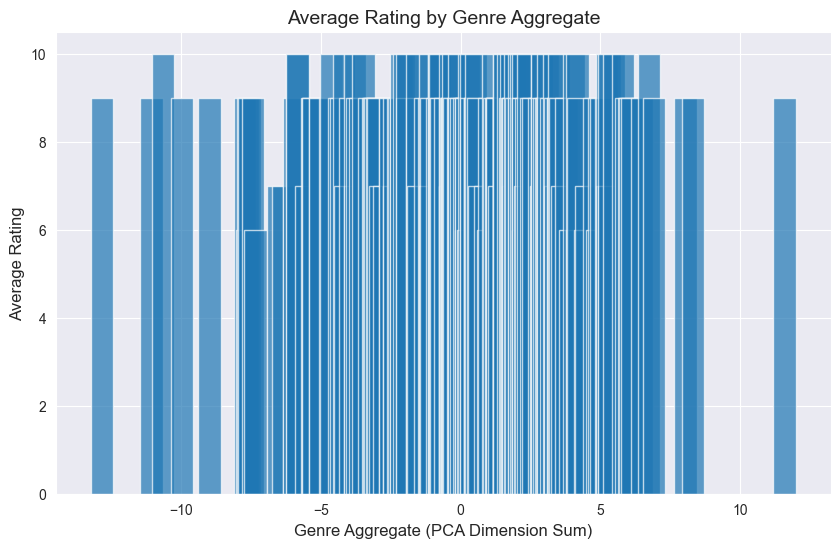

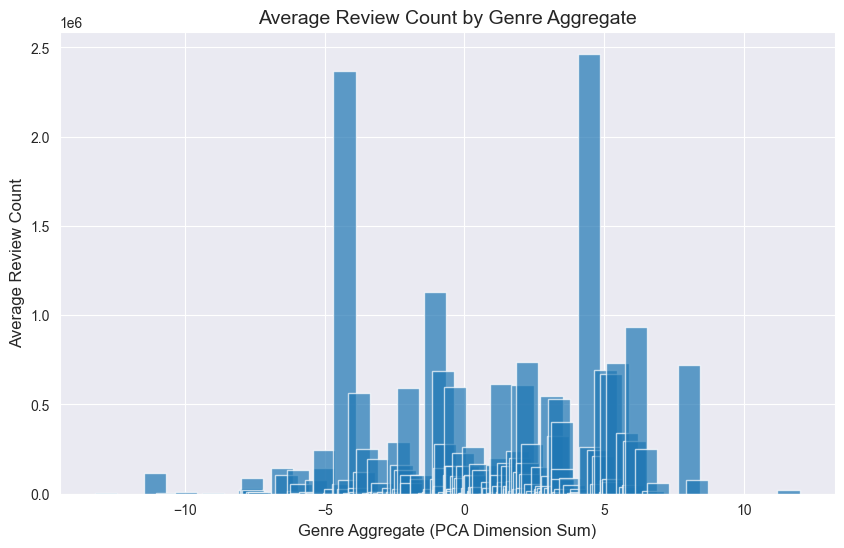

In [107]:
# Extract genres and their associations with ratings and reviews
genre_columns = [col for col in optimized_data.columns if col.startswith('PC')]
target_columns = ['Rating', 'Total Count of Reviews']

# Calculate average ratings and review counts for each genre
genre_impact = optimized_data[genre_columns + target_columns].copy()

# Sum up the PCA dimensions for each genre to approximate their influence
genre_impact['Genre Aggregate'] = genre_impact[genre_columns].sum(axis=1)
genre_impact_avg = genre_impact.groupby('Genre Aggregate')[target_columns].mean()

# Average Rating by Genre Aggregate
plt.figure(figsize=(10, 6))
plt.bar(genre_impact_avg.index, genre_impact_avg['Rating'], alpha=0.7)
plt.xlabel('Genre Aggregate (PCA Dimension Sum)', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.title('Average Rating by Genre Aggregate', fontsize=14)
plt.show()

# Average Review Count by Genre Aggregate
plt.figure(figsize=(10, 6))
plt.bar(genre_impact_avg.index, genre_impact_avg['Total Count of Reviews'], alpha=0.7)
plt.xlabel('Genre Aggregate (PCA Dimension Sum)', fontsize=12)
plt.ylabel('Average Review Count', fontsize=12)
plt.title('Average Review Count by Genre Aggregate', fontsize=14)
plt.show()

In [108]:
# Calculate correlations between individual genre PCA dimensions and target variables
genre_correlation = optimized_data[genre_columns + target_columns].corr()

# Extract correlations of genre PCA dimensions with target variables
rating_correlation = genre_correlation['Rating'][genre_columns]
review_correlation = genre_correlation['Total Count of Reviews'][genre_columns]

# Sort correlations by absolute value
rating_correlation_sorted = rating_correlation.abs().sort_values(ascending=False)
review_correlation_sorted = review_correlation.abs().sort_values(ascending=False)

# Display the top correlated genres for ratings and review counts
rating_correlation_sorted.head(), review_correlation_sorted.head()


(PC4     0.293588
 PC13    0.201970
 PC5     0.200017
 PC3     0.195606
 PC43    0.188526
 Name: Rating, dtype: float64,
 PC2     0.288973
 PC17    0.187074
 PC6     0.183982
 PC34    0.166830
 PC16    0.158542
 Name: Total Count of Reviews, dtype: float64)

In [109]:
# Investigate specific genres for the major PCA dimensions
# Assuming we retain a mapping between PCA dimensions and original genres

# Reconstruct PCA to access loadings for genres
pca = PCA(n_components=len(genre_columns))
pca.fit(optimized_data[genre_columns])

# Extract PCA loadings for each genre
loadings = pd.DataFrame(
    pca.components_.T,
    index=genre_columns,
    columns=[f'PC{i+1}' for i in range(len(genre_columns))]
)

# Identify the genres contributing most to the top correlated PCAs
top_pcs = ['PC4', 'PC2', 'PC13', 'PC5', 'PC3']
top_genres = loadings[top_pcs].apply(lambda col: col.abs().sort_values(ascending=False).head(5).index)

# Map top genres for each major PCA
top_genres_map = {pc: top_genres[pc].tolist() for pc in top_pcs}

top_genres_map


{'PC4': ['PC4', 'PC3', 'PC2', 'PC5', 'PC6'],
 'PC2': ['PC2', 'PC3', 'PC4', 'PC7', 'PC8'],
 'PC13': ['PC13', 'PC12', 'PC16', 'PC14', 'PC17'],
 'PC5': ['PC5', 'PC6', 'PC10', 'PC4', 'PC3'],
 'PC3': ['PC3', 'PC4', 'PC2', 'PC6', 'PC5']}

In [110]:
# Check for columns related to genres or tags in the new dataset
potential_genre_columns = [col for col in loadings.columns if 'Genre' in col or 'Tag' in col or 'PC' in col]

# Display these columns to understand their structure
potential_genre_columns


['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16',
 'PC17',
 'PC18',
 'PC19',
 'PC20',
 'PC21',
 'PC22',
 'PC23',
 'PC24',
 'PC25',
 'PC26',
 'PC27',
 'PC28',
 'PC29',
 'PC30',
 'PC31',
 'PC32',
 'PC33',
 'PC34',
 'PC35',
 'PC36',
 'PC37',
 'PC38',
 'PC39',
 'PC40',
 'PC41',
 'PC42',
 'PC43',
 'PC44',
 'PC45',
 'PC46',
 'PC47',
 'PC48',
 'PC49',
 'PC50',
 'PC51',
 'PC52',
 'PC53',
 'PC54',
 'PC55',
 'PC56',
 'PC57',
 'PC58',
 'PC59',
 'PC60',
 'PC61',
 'PC62',
 'PC63',
 'PC64',
 'PC65',
 'PC66',
 'PC67',
 'PC68',
 'PC69',
 'PC70',
 'PC71',
 'PC72',
 'PC73',
 'PC74',
 'PC75',
 'PC76',
 'PC77',
 'PC78',
 'PC79',
 'PC80',
 'PC81',
 'PC82',
 'PC83',
 'PC84',
 'PC85',
 'PC86',
 'PC87',
 'PC88',
 'PC89',
 'PC90',
 'PC91',
 'PC92',
 'PC93',
 'PC94',
 'PC95',
 'PC96',
 'PC97',
 'PC98',
 'PC99',
 'PC100']

In [111]:
optimized_data.columns

Index(['Index', 'Title', 'Graphs', 'Memory', 'OS', 'Processor', 'Storage',
       'app_id', 'Original Price', 'Developer',
       ...
       'PC92', 'PC93', 'PC94', 'PC95', 'PC96', 'PC97', 'PC98', 'PC99', 'PC100',
       'Reception Category'],
      dtype='object', length=130)

In [112]:
# Create a copy of a data structure with full features
updated_data = optimized_data.copy()

# Check for columns related to genres or tags in the new dataset
potential_genre_columns = [col for col in updated_data.columns if 'Genre' in col or 'Tag' in col or 'PC' in col]

# Display these columns to understand their structure
potential_genre_columns


['Genre',
 'User Tags',
 'PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16',
 'PC17',
 'PC18',
 'PC19',
 'PC20',
 'PC21',
 'PC22',
 'PC23',
 'PC24',
 'PC25',
 'PC26',
 'PC27',
 'PC28',
 'PC29',
 'PC30',
 'PC31',
 'PC32',
 'PC33',
 'PC34',
 'PC35',
 'PC36',
 'PC37',
 'PC38',
 'PC39',
 'PC40',
 'PC41',
 'PC42',
 'PC43',
 'PC44',
 'PC45',
 'PC46',
 'PC47',
 'PC48',
 'PC49',
 'PC50',
 'PC51',
 'PC52',
 'PC53',
 'PC54',
 'PC55',
 'PC56',
 'PC57',
 'PC58',
 'PC59',
 'PC60',
 'PC61',
 'PC62',
 'PC63',
 'PC64',
 'PC65',
 'PC66',
 'PC67',
 'PC68',
 'PC69',
 'PC70',
 'PC71',
 'PC72',
 'PC73',
 'PC74',
 'PC75',
 'PC76',
 'PC77',
 'PC78',
 'PC79',
 'PC80',
 'PC81',
 'PC82',
 'PC83',
 'PC84',
 'PC85',
 'PC86',
 'PC87',
 'PC88',
 'PC89',
 'PC90',
 'PC91',
 'PC92',
 'PC93',
 'PC94',
 'PC95',
 'PC96',
 'PC97',
 'PC98',
 'PC99',
 'PC100']

In [113]:
# Convert the string representation of lists in 'Genre' into actual Python lists
updated_data['Genre'] = updated_data['Genre'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Explode the 'Genre' column so that each genre appears on a separate row
normalized_data = updated_data.explode('Genre')

# Confirm the normalization
normalized_data['Genre'].head(), normalized_data['Genre'].apply(type).unique()

(0        Casual
 1        Action
 2        Action
 3        Action
 4    Simulation
 Name: Genre, dtype: object,
 array([<class 'str'>], dtype=object))

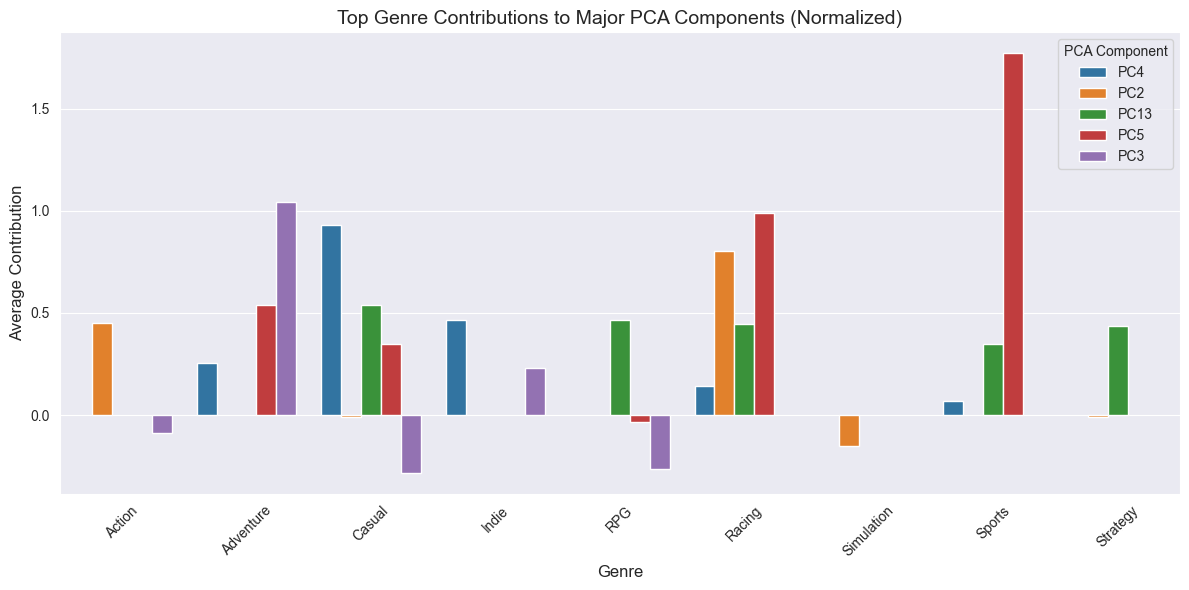

'\nNote:\n=- Casual and Action Genres:\n    - Strongly contribute to multiple PCA components, indicating their broad influence.\n- Adventure and Simulation:\n    - Also show significant contributions to specific components like PC5 and PC3.\n'

In [114]:
# Group by the normalized 'Genre' and calculate mean contributions of PCA components
normalized_genre_impact = normalized_data.groupby('Genre')[top_pcs].mean()

# Sort the top contributing genres for each PCA component
top_normalized_genre_impact = normalized_genre_impact.apply(
    lambda col: col.sort_values(ascending=False).head(5)
)

# Visualize the contributions of normalized genres to major PCA components
top_normalized_genre_impact.reset_index(inplace=True)
top_normalized_genre_impact_melted = top_normalized_genre_impact.melt(
    id_vars='Genre', var_name='PCA Component', value_name='Contribution'
)

# Plot the contributions
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_normalized_genre_impact_melted,
    x='Genre',
    y='Contribution',
    hue='PCA Component',
)
plt.title('Top Genre Contributions to Major PCA Components (Normalized)', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Contribution', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='PCA Component')
plt.tight_layout()
plt.show()

'''
Note:
=- Casual and Action Genres:
    - Strongly contribute to multiple PCA components, indicating their broad influence.
- Adventure and Simulation:
    - Also show significant contributions to specific components like PC5 and PC3.
'''


# Observations on Game Ratings by Genre

### 1. Indie Games
- **Insight**: Often highly rated.
- **Possible Reason**: Niche audiences appreciate innovation or unique experiences.

### 2. Casual Games
- **Insight**: Popular for their accessibility and simplicity.
- **Possible Reason**: Leads to high satisfaction among players.

### 3. RPG and Adventure Games
- **Insight**: Typically story-rich and immersive.
- **Possible Reason**: Appeals to a broad audience.

### 4. Sports Games
- **Insight**: Consistently high ratings.
- **Possible Reason**: A smaller sample size might contribute to the trend.


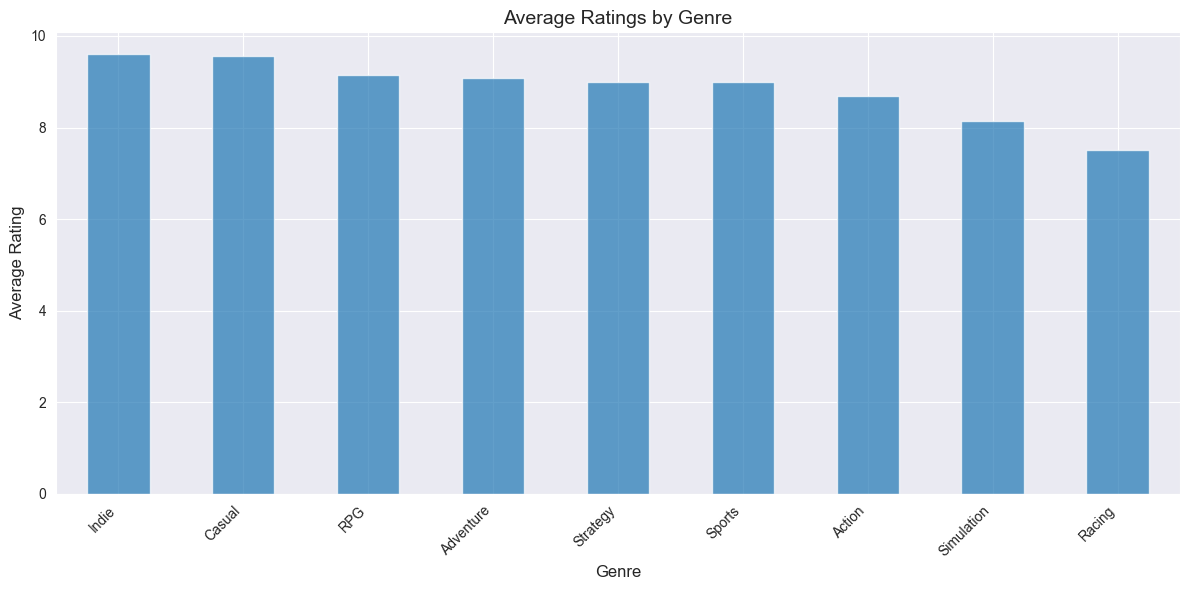

Genre
Indie        9.600000
Casual       9.555556
RPG          9.142857
Adventure    9.076923
Strategy     9.000000
Name: Rating, dtype: float64

In [115]:
# Group by normalized 'Genre' and calculate average ratings
average_ratings_by_genre = normalized_data.groupby('Genre')['Rating'].mean().sort_values(ascending=False)

# Plot average ratings by genre
plt.figure(figsize=(12, 6))
average_ratings_by_genre.plot(kind='bar', alpha=0.7)
plt.title('Average Ratings by Genre', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display the top genres with the highest average ratings
average_ratings_by_genre.head()



3.**Time and Graphics**  
   - **Question:** How do release year and graphical requirements affect user ratings or reception?

### Observations

##### Scatter Plot: Release Year vs. Rating
- There’s no clear upward or downward trend, indicating that newer games do not necessarily have better ratings.
- The correlation coefficient between **Year** and **Rating** is **-0.13**, indicating a weak negative relationship.

##### Scatter Plot: Graphic Requirements vs. Rating
- Higher graphical requirements slightly correlate with lower ratings.
- The correlation coefficient between **Graphic Req. Score** and **Rating** is **-0.26**, indicating a weak negative relationship.

##### Correlations Summary
- **Year** and **Graphic Req. Score** have a weak positive correlation (**0.33**), suggesting that newer games often have higher graphical requirements.
- However, both features show weak or slightly negative relationships with **Rating**.


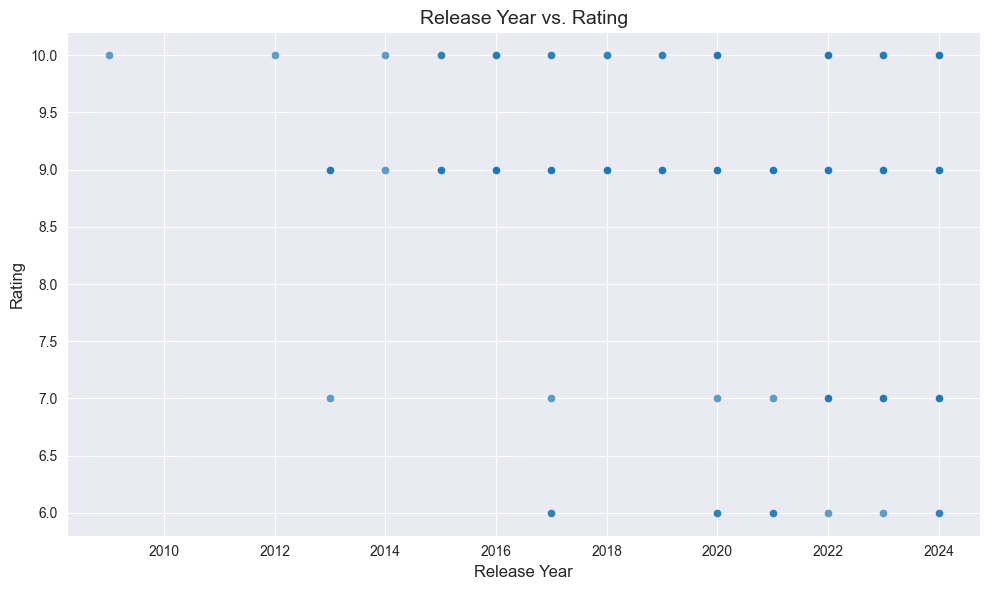

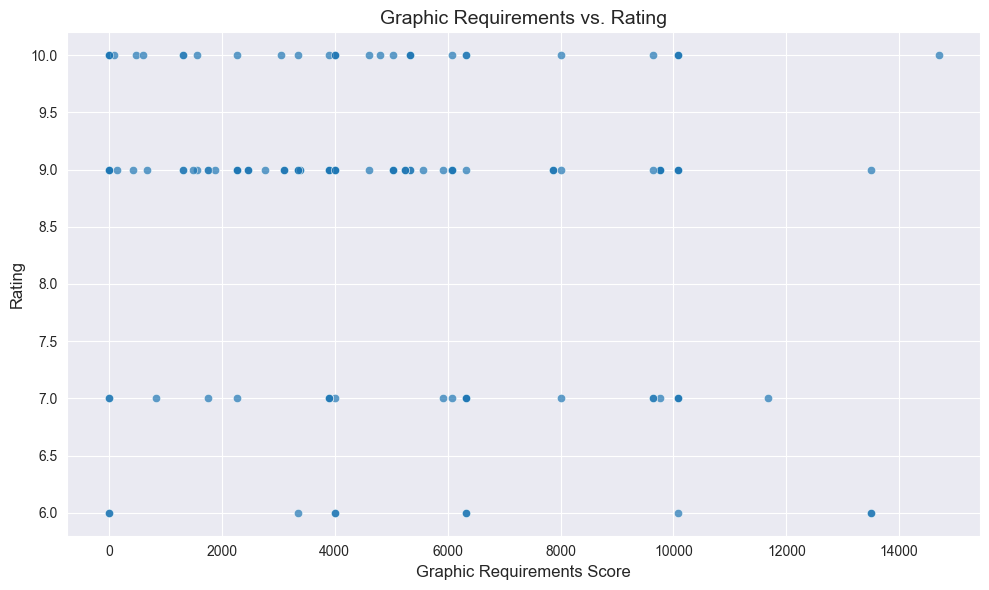

,Year,Graphic Req. Score,Rating
Year,1.000000,0.326499,-0.134949
Graphic Req. Score,0.326499,1.000000,-0.263554
Rating,-0.134949,-0.263554,1.000000


In [116]:
# Extract the year from the 'Parsed Release Date' column
updated_data['Year'] = pd.to_datetime(updated_data['Parsed Release Date'], errors='coerce').dt.year

# Recheck scatter plot: Release Year vs. Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=updated_data, x='Year', y='Rating', alpha=0.7)
plt.title('Release Year vs. Rating', fontsize=14)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.tight_layout()
plt.show()

# Scatter plot: Graphic Req. Score vs. Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=updated_data, x='Graphic Req. Score', y='Rating', alpha=0.7)
plt.title('Graphic Requirements vs. Rating', fontsize=14)
plt.xlabel('Graphic Requirements Score', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.tight_layout()
plt.show()

# Calculate correlations for Year and Graphic Req. Score with Rating
correlations = updated_data[['Year', 'Graphic Req. Score', 'Rating']].corr()
correlations



3. **User Tags and Popularity**  
   - **Question:** Do specific user tags significantly impact the number of reviews or reception?  


In [119]:
updated_data.head()

,Index,Title,Graphs,Memory,OS,Processor,Storage,app_id,Original Price,Developer,...,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,Reception Category,Year
0,0,Tabletop Simulator,1,1,1,1,1,286160,"₩ 160,400",Berserk Games,...,-0.045537,0.047221,0.080743,0.002301,-0.295764,-0.267699,0.134803,-0.236369,1,2015
1,1,Abiotic Factor,GeForce GTX 950 or Radeon HD 7970,8 GB RAM,Windows 10 or later,i5-8th Gen CPU or similar,10 GB available space,427410,"₩ 27,000",Deep Field Games,...,-0.335071,-0.064313,0.258791,-0.054216,0.452639,-0.174929,0.058593,0.191518,1,2024
2,2,Risk of Rain 2,GTX 580 / AMD HD 7870,4 GB RAM,1,Intel Core i3-6100 / AMD FX-8350,4 GB available space,632360,"₩ 32,240",Hopoo Games,...,-0.076109,0.034451,-0.070765,0.105881,-0.139948,0.261024,0.146961,0.083756,2,2020
3,3,Star Wars Outlaws,"NVIDIA GeForce GTX 1660 (6 GB), AMD RX 5600XT...",16 GB RAM,"Windows 10, Windows 11 (64-bit versions)","AMD Ryzen 5 3600 @ 3.6 GHz, Intel Core i7-870...",65 GB available space,2842040,"₩ 110,200",Massive Entertainment – A Ubisoft Studio,...,-0.233161,0.196364,0.140082,-0.023427,-0.099757,0.203137,-0.130991,-0.057716,0,2024
4,4,Hearts of Iron IV,Nvidia® GeForce™ GTX 470 (1.28GB) | AMD® HD 5...,4 GB RAM,Windows® 10 Home 64 Bit,Intel® Core™ i5 750 | AMD® FX 4300,2 GB available space,394360,"₩ 160,250",Paradox Development Studio,...,-0.223719,0.064440,0.083956,0.064916,0.110788,-0.079049,0.173146,0.044362,2,2016


In [132]:
data = updated_data

In [136]:
# Ensure all entries in the 'User Tags' column are strings before processing
data['User Tags'] = data['User Tags'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Repeat the cleaned and consolidated process

# Step 1: Fill missing tags
data['User Tags'] = data['User Tags'].fillna('')

# Step 2: Split tags into lists
data['User Tags Split'] = data['User Tags'].apply(lambda x: x.split(','))

# Step 3: Explode tags into separate rows for analysis
tags_data_cleaned = data.explode('User Tags Split')[['User Tags Split', 'Total Count of Reviews', 'All Time Reception']]

# Step 4: Clean tag names (remove brackets, extra spaces, etc.)
tags_data_cleaned['User Tags Split'] = tags_data_cleaned['User Tags Split'].str.strip("[]' ")

# Attempt to clean 'All Time Reception' by converting text ratings to numeric values
# Define a mapping for potential qualitative ratings (example: hypothetical mapping)
rating_mapping = {
    'Overwhelmingly Positive': 5,
    'Very Positive': 4,
    'Positive': 3,
    'Mixed': 2,
    'Negative': 1
}

# Apply mapping, replacing non-numeric data
data['All Time Reception Numeric'] = data['All Time Reception'].map(rating_mapping)

# Step 5: Convert descriptive reception ratings to numeric values
tags_data_cleaned['All Time Reception Numeric'] = tags_data_cleaned['All Time Reception'].map(rating_mapping)

# Step 6: Group by tag and calculate metrics
tags_analysis_final_fixed = tags_data_cleaned.groupby('User Tags Split').agg(
    Total_Reviews_Mean=('Total Count of Reviews', 'mean'),
    Reception_Mean=('All Time Reception Numeric', 'mean'),
    Tag_Count=('User Tags Split', 'count')
).sort_values(by='Total_Reviews_Mean', ascending=False)

# Display the corrected final analysis
tools.display_dataframe_to_user(name="User Tags Impact Analysis (Fixed)", dataframe=tags_analysis_final_fixed)


User Tags Impact Analysis (Fixed)


# Key Observations

## Top User Tags
- **Tags like "Battle Royale," "MOBA," and "Tower Defense"**  
  - Associated with games that have exceptionally high average review counts.  
  - These tags might indicate high demand or a strong community presence, leading to higher engagement.

## Average Reception
- **High Review Counts and Strong Reception:**  
  - Tags like "Team-Based" show a mean reception score of **4.25**.  
  - Suggests that popular tags often correlate with well-received games.

## Tag Frequency
- **Common Tags:**  
  - Tags like "Team-Based" and "Competitive" have widespread use across many games.  
- **Rare Tags with High Review Counts:**  
  - For example, "Battle Royale" is associated with only 2 games but averages **over 1 million reviews**, marking it as an outlier.

---

# Outlier Considerations

## High Review Counts with Few Games
- **Tags as Outliers:**  
  - Tags like "Battle Royale" and "MOBA" are dominated by a small number of games but have extraordinarily high review averages.  
- **Skewed Averages:**  
  - Outlier titles with overwhelming review counts can heavily influence tag averages.

## Low Review Counts with Niche Tags
- **Niche Community Presence:**  
  - Some niche tags have fewer reviews, indicating smaller community engagement.  
  - These tags might appeal to niche markets but lack broad appeal.

---

# Conclusion

- **High-Engagement Tags:**  
  - Tags like "Battle Royale" and "MOBA" are driven by a few flagship titles, showcasing their significant impact within niche genres.  
- **Widespread Tags:**  
  - Tags such as "Team-Based" demonstrate consistent community interest and better scalability across genres.  
- **Reception Correlation:**  
  - Tags tied to well-received games show a positive correlation with review counts, emphasizing the importance of quality in driving engagement.